In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import numpy as np
import pickle

In [3]:
with open("test_set_17_227.pkl", "rb") as handle:
    temp_faces = pickle.load(handle)
faces = {name.split()[-1]: temp_faces[name] for name in temp_faces}

In [4]:
data = pd.read_csv("MTurker_Results_0407.csv")

## classifier saliency

In [34]:
with open("new_true_class_saliency_mask_trial2_10.pkl", "rb") as handle:
    temp_saliency_masks = pickle.load(handle)
saliency_masks = {name.split()[-1]: temp_saliency_masks[name] for name in temp_saliency_masks}

In [35]:
saliency_meanmap = np.zeros((227,227))
count = 0
for name in saliency_masks:
    saliency_meanmap += saliency_masks[name].sum(axis=0)
    count += saliency_masks[name].shape[0]
saliency_meanmap = saliency_meanmap / count

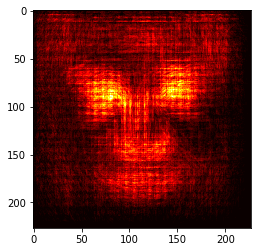

In [36]:
# average saliency across all faces
plt.imshow(saliency_meanmap, cmap='hot', vmin=0.0)

## Turker Saliency

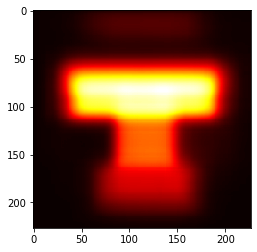

In [47]:
meanmap_list = []
for star in data["last_name"].unique():
    meanmap = np.zeros((227,227))
    for rowx in data[data["last_name"]==star].iterrows():
        row=rowx[1]
        meanmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    meanmap = meanmap / data[data["last_name"]==star].shape[0]
    meanmap_list.append(meanmap)
meanmap = np.stack(meanmap_list).mean(axis=0)
plt.imshow(meanmap, cmap='hot', vmin=0.0)

In [28]:
plt.close()

In [11]:
selected_idxs = {"Butler":9, "Vartan": 9, "Radcliffe":12, "Cage":7, 
                 "Aniston":11, "Chenoweth":12, "Drescher":12, "Ferrera": 12,
                 "Gomez":12, "Hathaway":12, "Hines":10, "Damon":12, "Harmon":8,
                 "Hader":8, "Bracco":13, "Carell": 13, "Baldwin": 12}

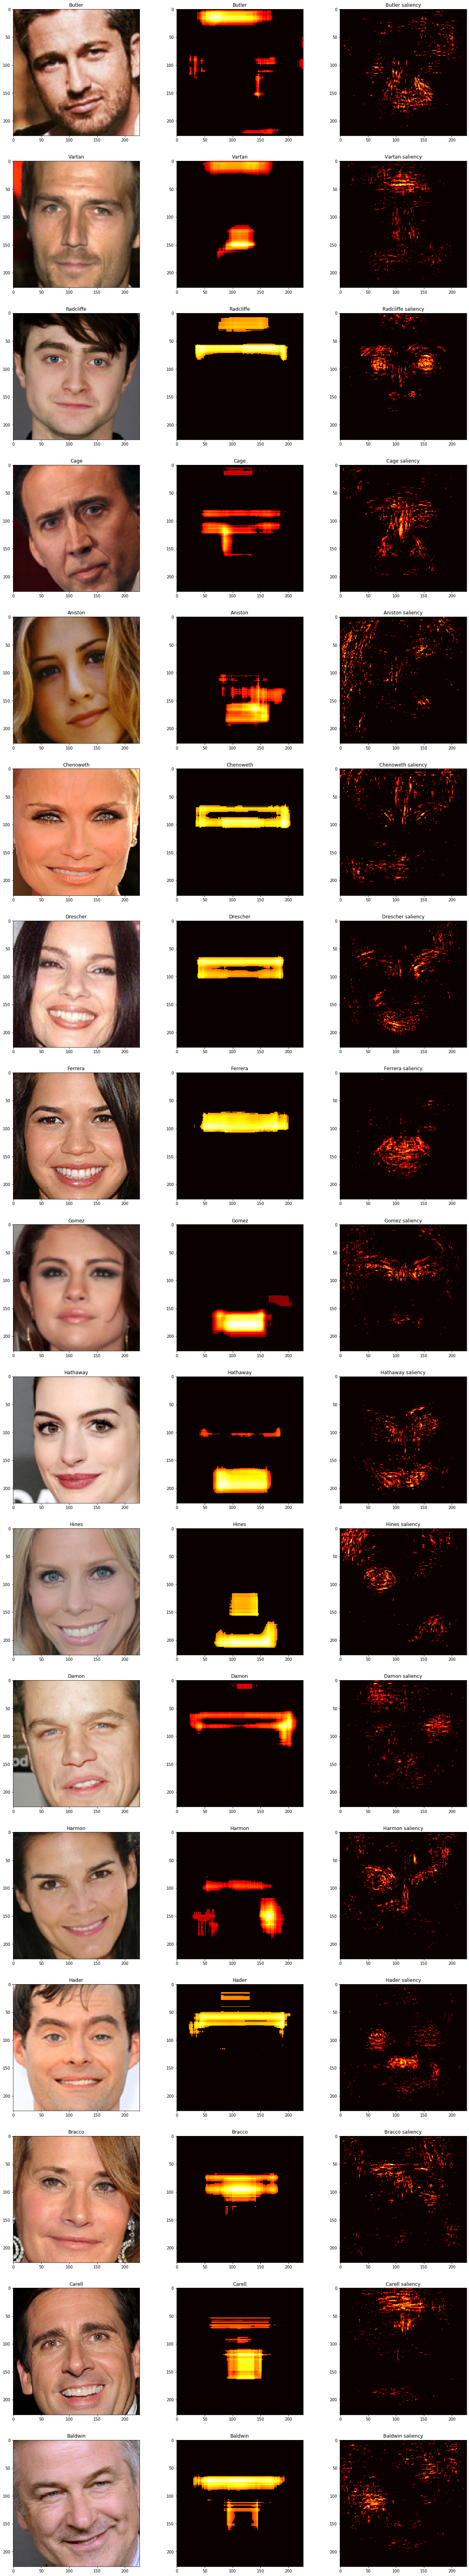

In [205]:
fig, axs = plt.subplots(17, 3, figsize=(21,119))
for i,star in enumerate(data.last_name.unique()):
    # plot an example of the test image
    axs[i,0].set_title(star)
    axs[i,0].imshow(faces[star][selected_idxs[star]]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0] - meanmap
    heatmap_rank = heatmap.ravel().argsort().argsort().reshape(heatmap.shape)
    heatmap = (heatmap_rank > 227*227*0.9).astype(float)* heatmap
    axs[i,1].set_title(star)
    axs[i,1].imshow(heatmap, cmap='hot', vmin=0)
    
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0] - saliency_meanmap
    saliency_heatmap_rank = saliency_heatmap.ravel().argsort().argsort().reshape(saliency_heatmap.shape)
    saliency_heatmap = (saliency_heatmap_rank > 227*227*0.95).astype(float) * saliency_heatmap
    axs[i,2].set_title(f"{star} saliency")
    axs[i,2].imshow(saliency_heatmap, cmap='hot', vmin=0)

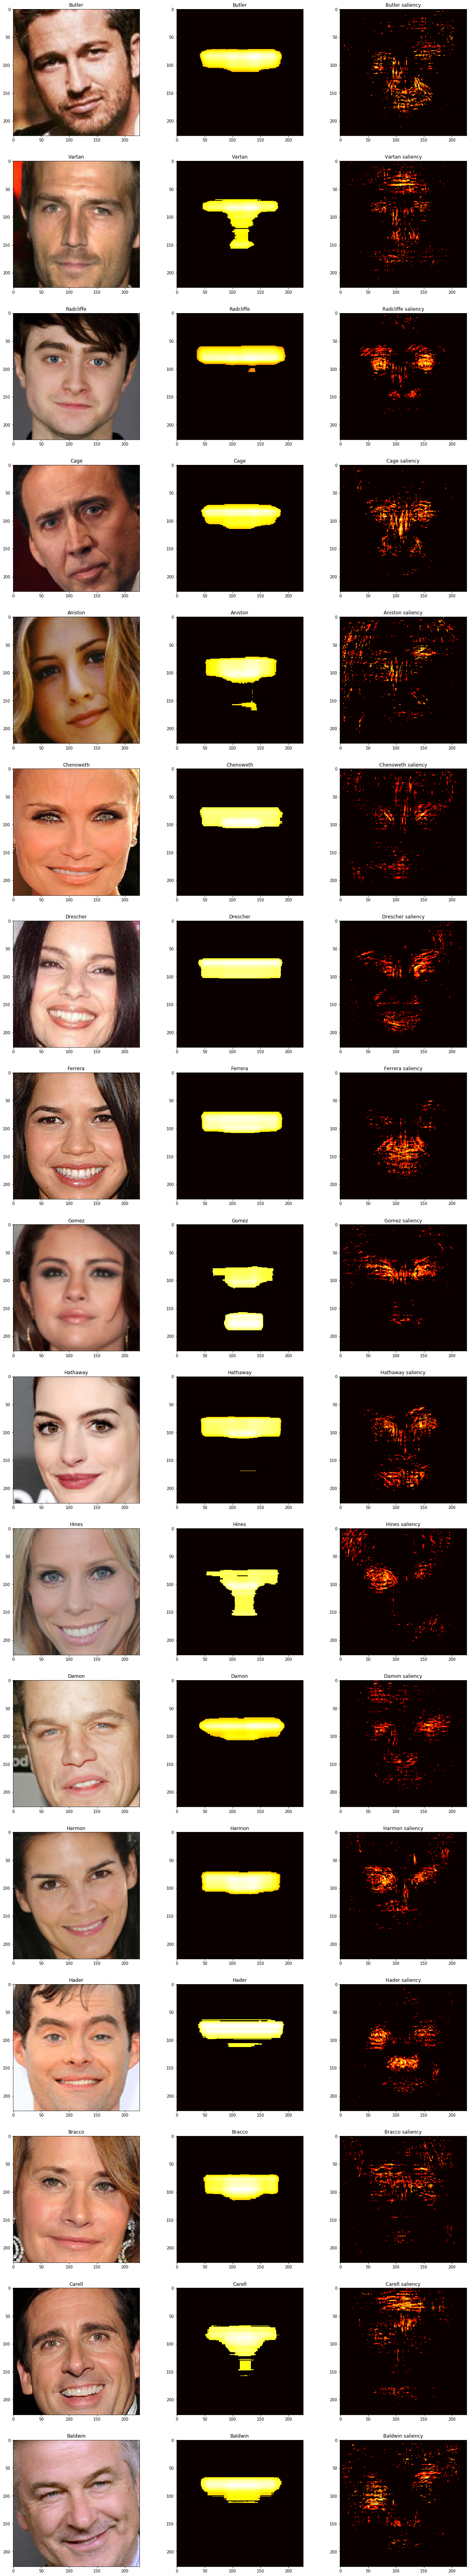

In [206]:
fig, axs = plt.subplots(17, 3, figsize=(21,119))
for i,star in enumerate(data.last_name.unique()):
    # plot an example of the test image
    axs[i,0].set_title(star)
    axs[i,0].imshow(faces[star][selected_idxs[star]]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0]
    heatmap_rank = heatmap.ravel().argsort().argsort().reshape(heatmap.shape)
    heatmap = (heatmap_rank > 227*227*0.9).astype(float)* heatmap
    axs[i,1].set_title(star)
    axs[i,1].imshow(heatmap, cmap='hot', vmin=0)
    
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0]
    saliency_heatmap_rank = saliency_heatmap.ravel().argsort().argsort().reshape(saliency_heatmap.shape)
    saliency_heatmap = (saliency_heatmap_rank > 227*227*0.95).astype(float) * saliency_heatmap
    axs[i,2].set_title(f"{star} saliency")
    axs[i,2].imshow(saliency_heatmap, cmap='hot', vmin=0)

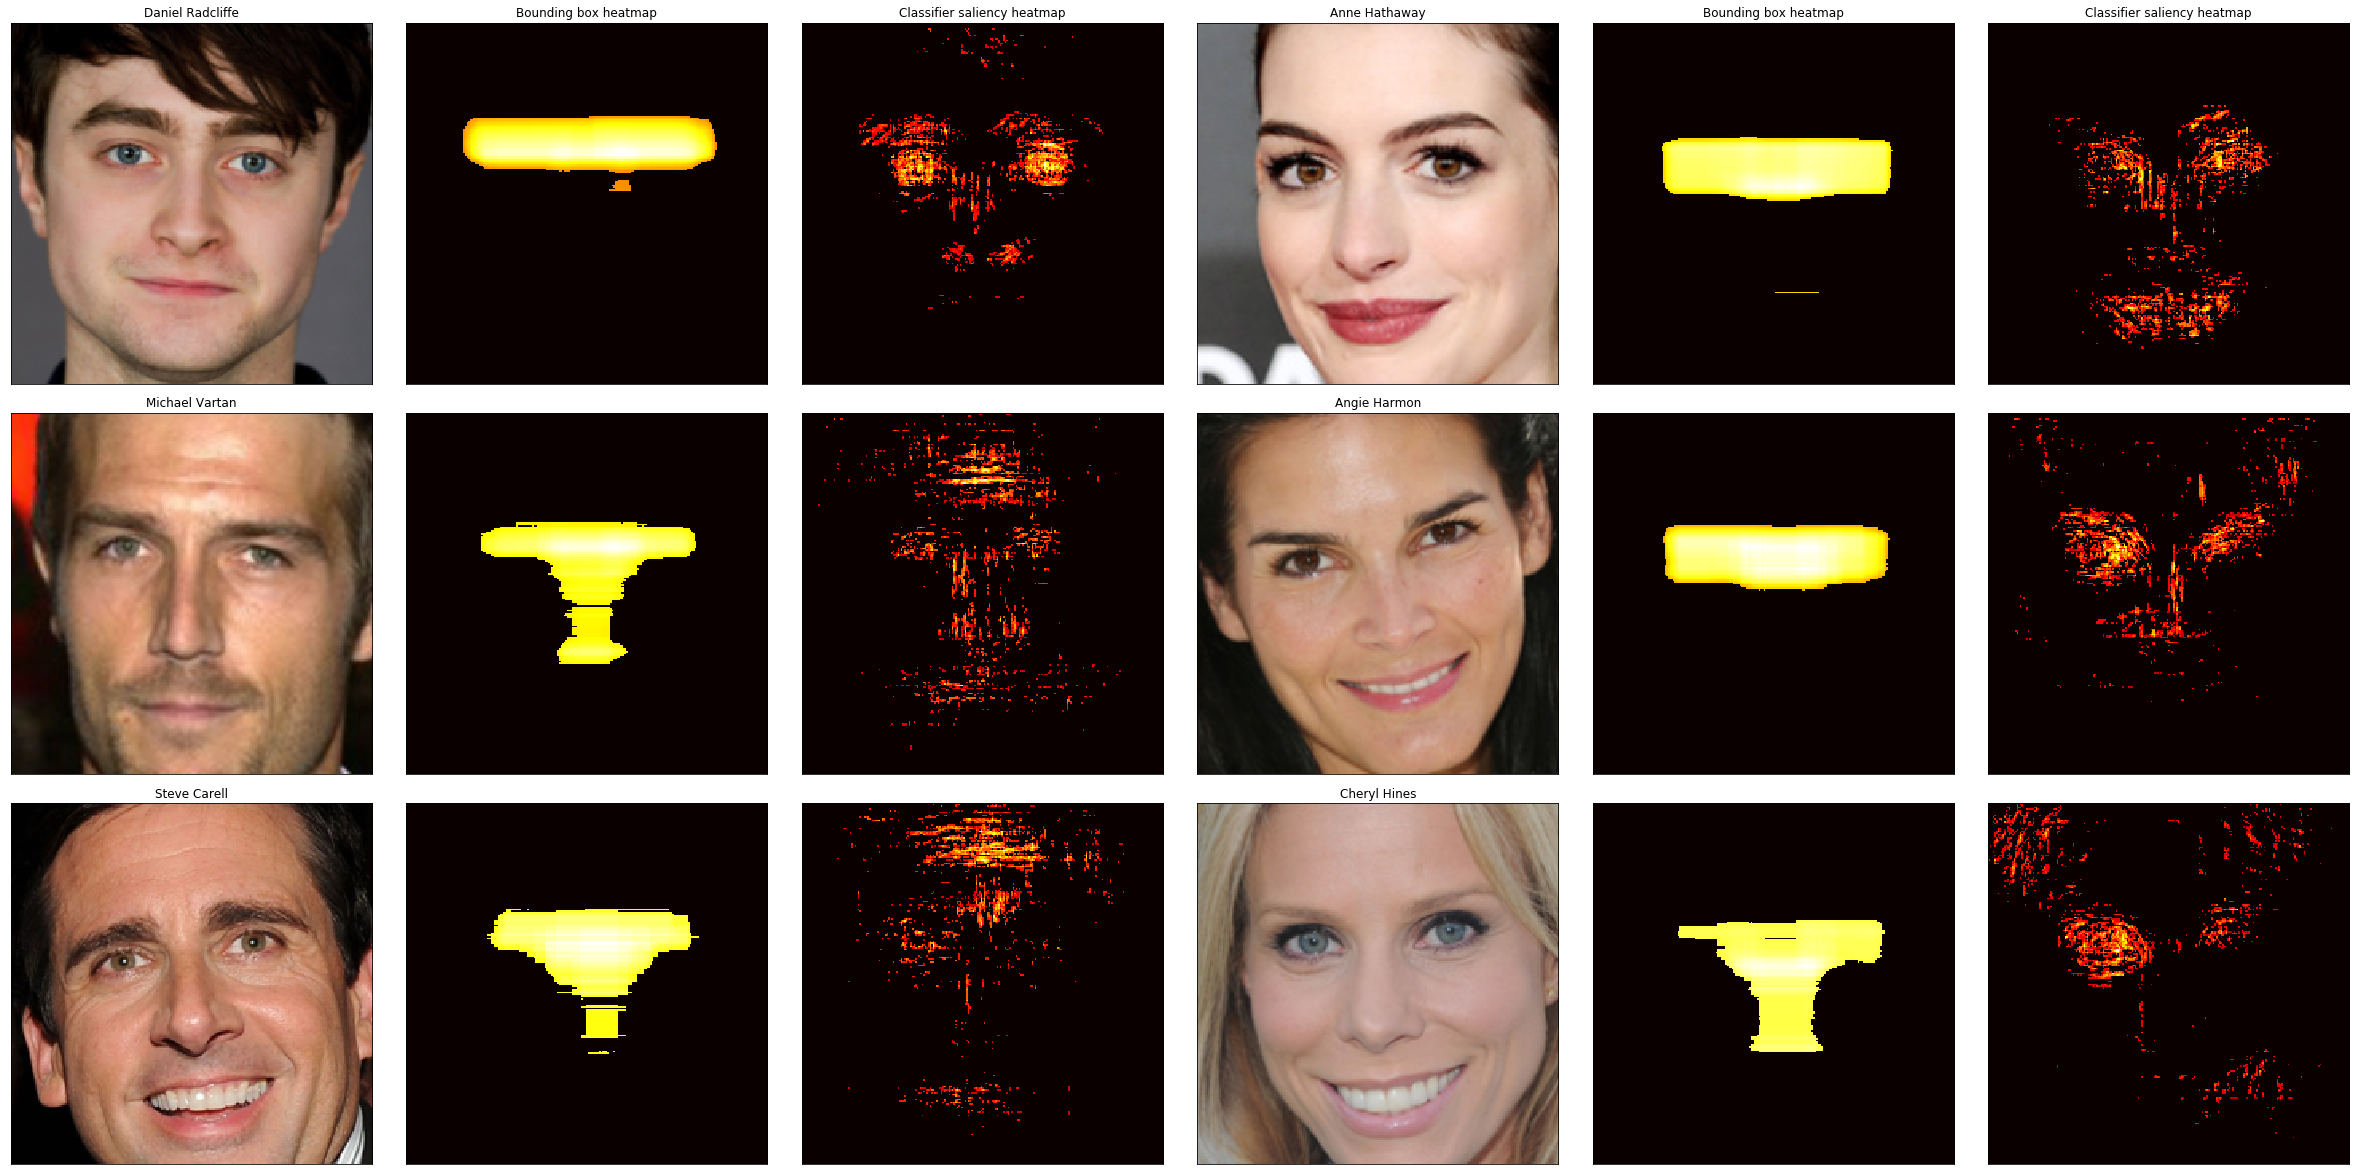

In [43]:
group_0 = ["Daniel Radcliffe", "Michael Vartan", "Steve Carell"]
group_1 = ["Anne Hathaway", "Angie Harmon", "Cheryl Hines"]

fig, axs = plt.subplots(3, 6, figsize=(42,21))
plt.subplots_adjust(wspace=0.08, hspace=0.08)

for i in range(3):
    for j in range(6):
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
    
for i in range(3):
    star = group_0[i].split()[-1]
    # plot an example of the test image
    axs[i,0].set_title(group_0[i])
    axs[i,0].imshow(faces[star][selected_idxs[star]]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0]
    heatmap_rank = heatmap.ravel().argsort().argsort().reshape(heatmap.shape)
    heatmap = (heatmap_rank > 227*227*0.9).astype(float)* heatmap
    if i==0:
        axs[i,1].set_title(f"Bounding box heatmap")
    axs[i,1].imshow(heatmap, cmap='hot', vmin=0)
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0]
    saliency_heatmap_rank = saliency_heatmap.ravel().argsort().argsort().reshape(saliency_heatmap.shape)
    saliency_heatmap = (saliency_heatmap_rank > 227*227*0.95).astype(float) * saliency_heatmap
    if i==0:
        axs[i,2].set_title(f"Classifier saliency heatmap")
    axs[i,2].imshow(saliency_heatmap, cmap='hot', vmin=0)
    
    
    ###########################################################################################
    star = group_1[i].split()[-1]
    # plot an example of the test image
    axs[i,3].set_title(group_1[i])
    axs[i,3].imshow(faces[star][selected_idxs[star]]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0]
    heatmap_rank = heatmap.ravel().argsort().argsort().reshape(heatmap.shape)
    heatmap = (heatmap_rank > 227*227*0.9).astype(float)* heatmap
    if i==0:
        axs[i,4].set_title(f"Bounding box heatmap")
    axs[i,4].imshow(heatmap, cmap='hot', vmin=0)
    
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0]
    saliency_heatmap_rank = saliency_heatmap.ravel().argsort().argsort().reshape(saliency_heatmap.shape)
    saliency_heatmap = (saliency_heatmap_rank > 227*227*0.95).astype(float) * saliency_heatmap
    if i == 0:
        axs[i,5].set_title(f"Classifier saliency heatmap")
    axs[i,5].imshow(saliency_heatmap, cmap='hot', vmin=0)
    
    

In [44]:
fig.savefig("heatmap.pdf", pad_inches=0.0, bbox_inches = 'tight')

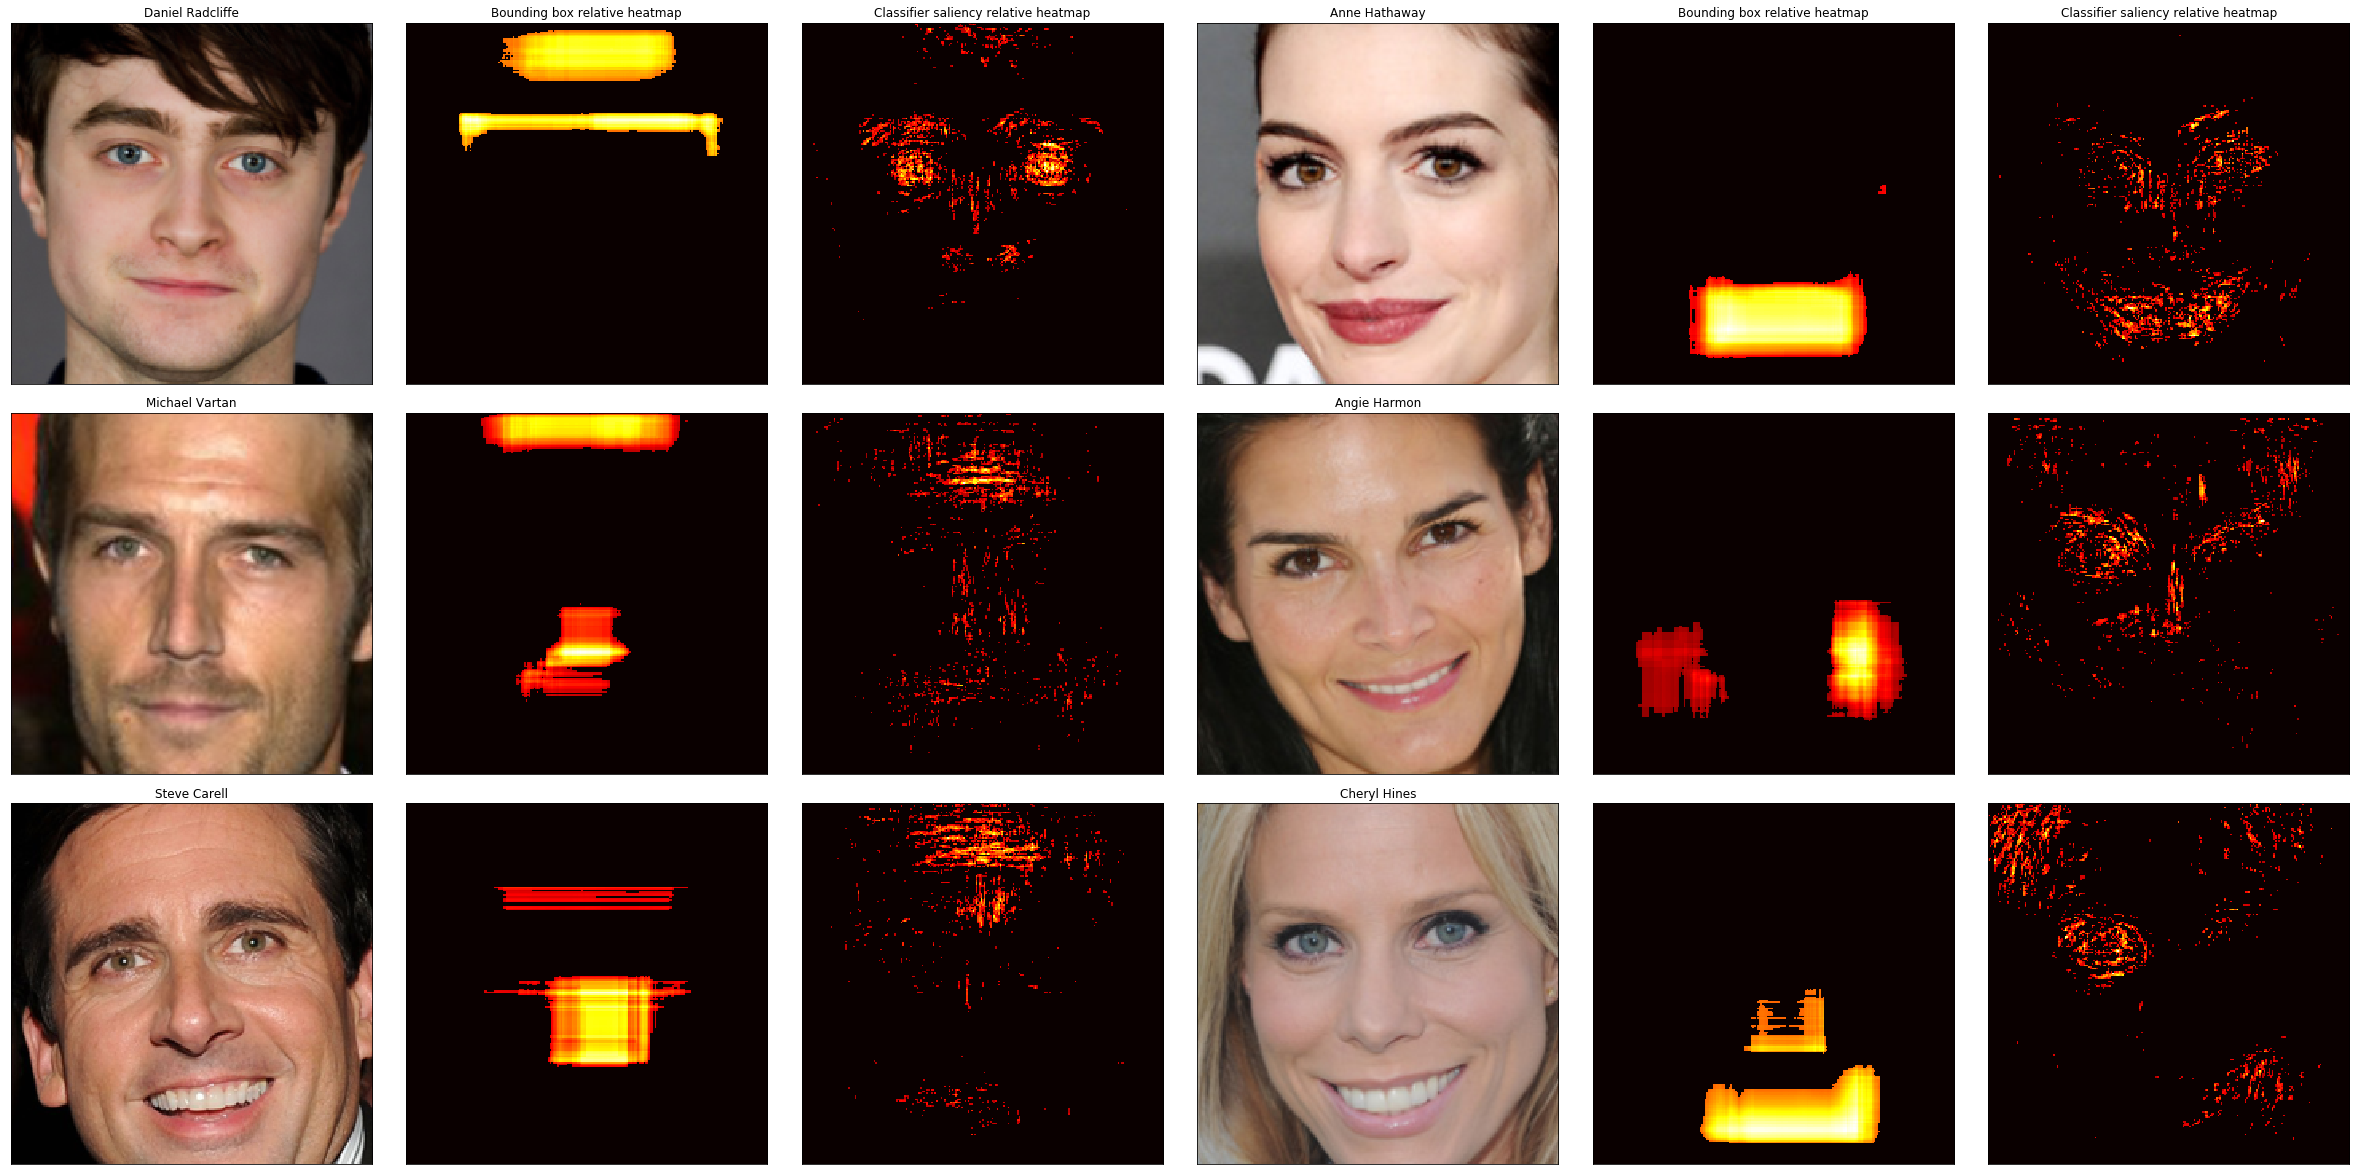

In [45]:
group_0 = ["Daniel Radcliffe", "Michael Vartan", "Steve Carell"]
group_1 = ["Anne Hathaway", "Angie Harmon", "Cheryl Hines"]

fig, axs = plt.subplots(3, 6, figsize=(42,21))
plt.subplots_adjust(wspace=0.08, hspace=0.08)

for i in range(3):
    for j in range(6):
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
    
for i in range(3):
    star = group_0[i].split()[-1]
    # plot an example of the test image
    axs[i,0].set_title(group_0[i])
    axs[i,0].imshow(faces[star][selected_idxs[star]]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0] - meanmap
    heatmap_rank = heatmap.ravel().argsort().argsort().reshape(heatmap.shape)
    heatmap = (heatmap_rank > 227*227*0.9).astype(float)* heatmap
    if i==0:
        axs[i,1].set_title(f"Bounding box relative heatmap")
    axs[i,1].imshow(heatmap, cmap='hot', vmin=0)
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0] - saliency_meanmap
    saliency_heatmap_rank = saliency_heatmap.ravel().argsort().argsort().reshape(saliency_heatmap.shape)
    saliency_heatmap = (saliency_heatmap_rank > 227*227*0.95).astype(float) * saliency_heatmap
    if i==0:
        axs[i,2].set_title(f"Classifier saliency relative heatmap")
    axs[i,2].imshow(saliency_heatmap, cmap='hot', vmin=0)
    
    
    ###########################################################################################
    star = group_1[i].split()[-1]
    # plot an example of the test image
    axs[i,3].set_title(group_1[i])
    axs[i,3].imshow(faces[star][selected_idxs[star]]/255.)
    
    # plot relative turker saliency
    selected =data.loc[(data.last_name==star)]
    heatmap = np.zeros((227,227))
    for rowx in selected.iterrows():
        row=rowx[1]
        heatmap[row["b0"]:row["b0"] + row["b2"] +1, row["b1"]:row["b1"] + row["b3"] +1] += 1
    heatmap = heatmap / selected.shape[0] - meanmap
    heatmap_rank = heatmap.ravel().argsort().argsort().reshape(heatmap.shape)
    heatmap = (heatmap_rank > 227*227*0.9).astype(float)* heatmap
    if i==0:
        axs[i,4].set_title(f"Bounding box relative heatmap")
    axs[i,4].imshow(heatmap, cmap='hot', vmin=0)
    
    
    # plot relative classifier saliency
    saliency_heatmap = saliency_masks[star].sum(axis=0)/saliency_masks[star].shape[0] - saliency_meanmap
    saliency_heatmap_rank = saliency_heatmap.ravel().argsort().argsort().reshape(saliency_heatmap.shape)
    saliency_heatmap = (saliency_heatmap_rank > 227*227*0.95).astype(float) * saliency_heatmap
    if i == 0:
        axs[i,5].set_title(f"Classifier saliency relative heatmap")
    axs[i,5].imshow(saliency_heatmap, cmap='hot', vmin=0)
    

In [46]:
fig.savefig("relative_heatmap.pdf", pad_inches=0.0, bbox_inches = 'tight')